In [2]:
# obtenemos el archivo de datos desde internet
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data 

In [3]:
# bibliotecas necesarias
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# A) Ejercicios Básicos

**1. Cargue los datos iris en un data frame (pandas) e imprima la descripción de los datos (columnas y renglones), tipo y las 10 primeras filas de los datos. Fuente de datos: https://archive.ics.uci.edu/ml/datasets/Iris.**

In [4]:
# definimos la ruta para cargar los datos
rutaDatos = "/content/iris.data"
# definimos los headers, el archivo no los tiene
headers = ["sepal length","sepal width","petal length","petal width","class"]
dictRename = {i:headers[i] for i in range(len(headers))}

# cargamos la información en un dataframe
df = pd.read_csv(rutaDatos,header=None)

# cambiamos los headers
df.rename(columns=dictRename,inplace=True)

# Forma (shape) de los datos
print("Forma de los datos")
print("Número de datos:",df.size)
row,col = df.shape
print("Columnas:",col)
print("Filas:",row)

# tipo de datos por columna
print("\nTipo de datos por columna")
for i in df.keys():
    print(i,":",df[i].dtype)

# primeras 10 columnas
print("\nPrimeras 10 filas")
print(df[:10])

Forma de los datos
Número de datos: 750
Columnas: 5
Filas: 150

Tipo de datos por columna
sepal length : float64
sepal width : float64
petal length : float64
petal width : float64
class : object

Primeras 10 filas
   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


**2. Imprima las llaves y el número de filas y de columnas.**

In [ ]:
# llaves 
print("Llaves de la tabla")
print(list(df.keys()))
# Número de filas y columnas
print("\nNúmero de filas y columnas")
row,col = df.shape
print("{} filas, {} columnas".format(row,col))

Llaves de la tabla
['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

Número de filas y columnas
150 filas, 5 columnas


**3. Obtenga el número de muestras faltantes o Nan.**

In [ ]:
# número si alguno es nulo por columna
#print(df.isnull().any())
# número de nulos por columnas
#print(df.isnull().sum())
# número de nulos totales
print("Número de NaN:",df.isnull().sum().sum())

# indices de los elementos nulos
#print(df.columns[df.isnull().any()])
# http://exponentis.es/como-encontrar-valores-nan-en-un-dataframe-python-pandas-y-modificarlos

Número de NaN: 0


**4. Cree un arreglo 2-D de tamaño 5x5 con unos en la diagonal y ceros en el resto. Convierta el arreglo NumPy a una matriz dispersa de ScyPy en formato CRS. Nota: una matriz se considera dispersa cuando el porcentaje de ceros es mayor a 0.5.**

In [ ]:
# 4
# calcular porcentaje de ceros
mat = np.identity(5)
print("Matríz de 5x5 con 1's en la diagonal (matriz identidad 5)")
print(mat)

print("\nPorcentajes de ceros:", (mat == 0).sum()/mat.size)

s = csr_matrix(mat)
print("\nMatriz dispersa")
print(s)
# https://www.analyticslane.com/2019/10/21/matrices-dispersas-sparse-matrix/

# Convertir un matriz dispersa en densa
#D = s.todense()


Matríz de 5x5 con 1's en la diagonal (matriz identidad 5)
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

Porcentajes de ceros: 0.8

Matriz dispersa
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0


**5. Muestre estadísticas básicas como percentil, media, mínimo, máximo y desviación estándar de los datos. Use describe para ello. Imprima sólo la media y la desviación estándar.**

In [ ]:
# 5
print("Estadísticas básicas de los datos")
stats = df.describe()
print(stats)
# media y desviación
print("\nMedia y desviación")
# hay que especificar explicitamente los indices
print(stats.iloc[[1,2],[0,1,2,3]])
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

Estadísticas básicas de los datos
       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Media y desviación
      sepal length  sepal width  petal length  petal width
mean      5.843333     3.054000      3.758667     1.198667
std       0.828066     0.433594      1.764420     0.763161


**6. Obtenga el número de muestras para cada clase.**

In [ ]:
#https://www.delftstack.com/es/howto/python-pandas/split-pandas-dataframe/
print("Número de muestras por clase")

# se agrupan los datos de acuerdo a la última columna
grupos = df.groupby(df["class"])
tipos = set(df["class"])
for tipo in tipos:
    print(tipo,"=",(df["class"]==tipo).sum())

Número de muestras por clase
Iris-setosa = 50
Iris-virginica = 50
Iris-versicolor = 50


**7. Añada un encabezado a los datos usando los nombres en iris.names y repita el ejercicio anterior.**

In [5]:
print("Cambiando headers")
headers = ['LargoSepalo','AnchoSepalo','LargoPetalo','AnchoPetalo','Clase']
df.columns=headers
print(df.head())

print("\nNúmero de muestras por Clase")
# se agrupan los datos de acuerdo a la última columna
grupos = df.groupby(df["Clase"])
tipos = set(df["Clase"])
for tipo in tipos:
    print(tipo,"=",(df["Clase"]==tipo).sum())

Cambiando headers
   LargoSepalo  AnchoSepalo  LargoPetalo  AnchoPetalo        Clase
0          5.1          3.5          1.4          0.2  Iris-setosa
1          4.9          3.0          1.4          0.2  Iris-setosa
2          4.7          3.2          1.3          0.2  Iris-setosa
3          4.6          3.1          1.5          0.2  Iris-setosa
4          5.0          3.6          1.4          0.2  Iris-setosa

Número de muestras por Clase
Iris-versicolor = 50
Iris-setosa = 50
Iris-virginica = 50


**8. Imprima las diez primeras filas y las dos primeras columnas del data frame usando los índices de las columnas.**

In [ ]:
#https://datacarpentry.org/python-ecology-lesson-es/03-index-slice-subset/
print("Primeras 10 filas y primeras dos columnas de los datos")
print(df.iloc[0:10, 0:2])

Primeras 10 filas y primeras dos columnas de los datos
   SepalLength  SepalWidth
0          5.1         3.5
1          4.9         3.0
2          4.7         3.2
3          4.6         3.1
4          5.0         3.6
5          5.4         3.9
6          4.6         3.4
7          5.0         3.4
8          4.4         2.9
9          4.9         3.1


# B) Ejercicios de visualización

**Utilizando matplotlib y/o seaborn**
**1. Cree una gráfica de barras que muestre la media, mínimo y máximo de todos los datos.**

Información
      LargoSepalo  AnchoSepalo  LargoPetalo  AnchoPetalo
mean     5.843333        3.054     3.758667     1.198667
min      4.300000        2.000     1.000000     0.100000
max      7.900000        4.400     6.900000     2.500000 



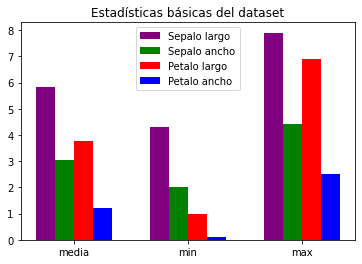

In [ ]:
# obteniendo estadísticas de nuevo
stats = df.describe()
# seleccionando media, min y max
info = stats.iloc[[1,3,7],[0,1,2,3]]
print("Información")
print(info,"\n")

# definiendo la gráfica
# etiquetas
etq = ["media","min","max"]
# series de datos
sl = list(info["LargoSepalo"])
sw = list(info["AnchoSepalo"])
pl = list(info["LargoPetalo"])
pw = list(info["AnchoPetalo"])

# grosor de la gráfica
grosor = 1
# posiciones de x para ponerlos 
x = np.arange(len(etq))*6
separacion = grosor/2
slg = plt.bar(x-3*separacion,sl,width=grosor,label="Sepalo largo",color="purple")
swg = plt.bar(x-separacion,sw,width=grosor,label="Sepalo ancho",color="green")
plg = plt.bar(x+separacion,pl,width=grosor,label="Petalo largo",color="red")
pwg = plt.bar(x+3*separacion,pw,width=grosor,label="Petalo ancho",color="blue")
plt.legend()
plt.title("Estadísticas básicas del dataset")

plt.xticks(x,labels=etq) #xticks para agregar nuevos ejes
plt.show()

**2. Muestre la frecuencia de las tres especies como una gráfica de pastel.**

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


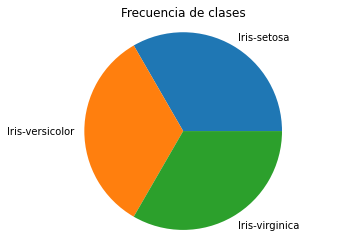

In [ ]:
#grupos = df.groupby(df["class"])
# sacamos las etiquetas
etiquetas = list(set(df["Clase"]))
# sacamos las frecuencias de cada etiqueta
frecuencias = [(df["Clase"]==tipo).sum() for tipo in etiquetas]
print(etiquetas)
#print(etiquetas)
#print(frecuencias)
plt.pie(frecuencias,labels=etiquetas)
plt.axis("equal")
plt.title("Frecuencia de clases")
plt.show()

**3. Cree una gráfica que muestre la relación entre la longitud y ancho del sépalo de las tres especies conjuntamente.**

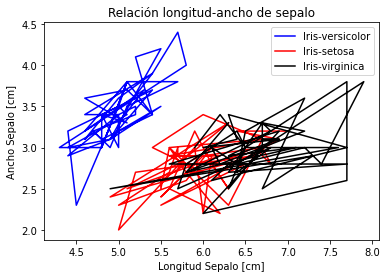

In [ ]:
sepalLength = list(df["LargoSepalo"])
sepalWidth = list(df["AnchoSepalo"])
plt.plot(sepalLength[:50],sepalWidth[:50],label="Iris-versicolor",color="blue")
plt.plot(sepalLength[50:100],sepalWidth[50:100],label="Iris-setosa",color="red")
plt.plot(sepalLength[100:150],sepalWidth[100:150],label="Iris-virginica",color="black")
plt.legend()
plt.title("Relación longitud-ancho de sepalo")
plt.xlabel("Longitud Sepalo [cm]")
plt.ylabel("Ancho Sepalo [cm]")
plt.show()

**4. Obtenga los histogramas de las variables SepalLength, SepalWidth, PetalLength y PetalWidth.**

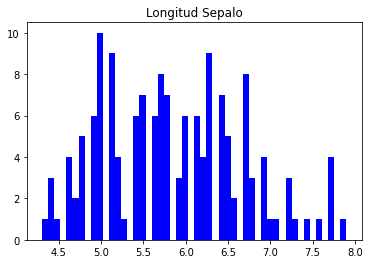

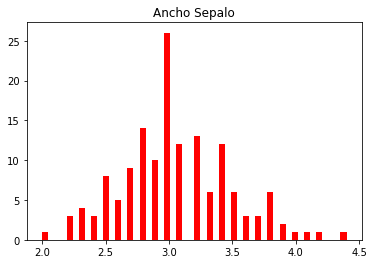

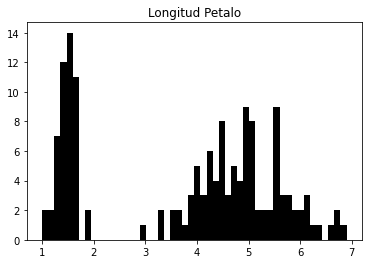

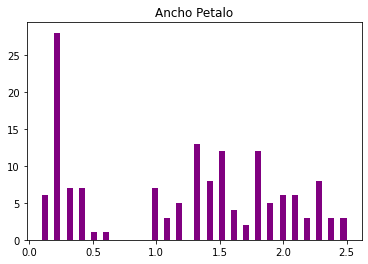

In [ ]:
plt.hist(df["LargoSepalo"],50,color="blue")
plt.title("Longitud Sepalo")
plt.show()
plt.hist(df["AnchoSepalo"],50,color="red")
plt.title("Ancho Sepalo")
plt.show()
plt.hist(df["LargoPetalo"],50,color="black")
plt.title("Longitud Petalo")
plt.show()
plt.hist(df["AnchoPetalo"],50,color="purple")
plt.title("Ancho Petalo")
plt.show()

**5. Cree gráficas de dispersión usando pairplot de seaborn y muestre con distintos colores las tres especies en las gráficas de dispersión.**

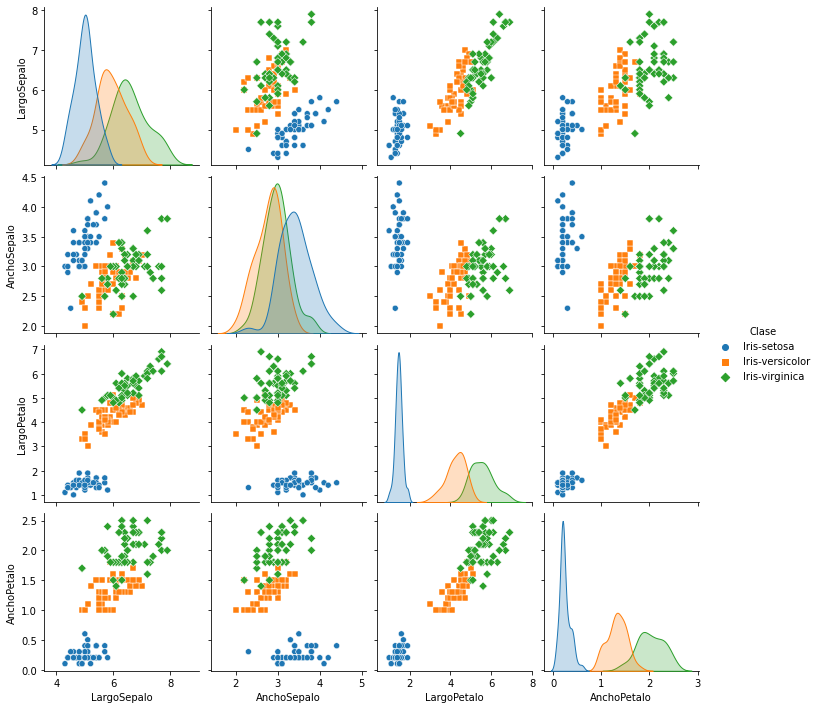

In [ ]:
sns.pairplot(df,hue="Clase", markers=["o", "s", "D"])
#https://seaborn.pydata.org/generated/seaborn.pairplot.html

**6. Cree una gráfica usando joinplot de seaborn para mostrar la dispersión entre la longitud y ancho del sépalo y las distribuciones de estas dos variables.**

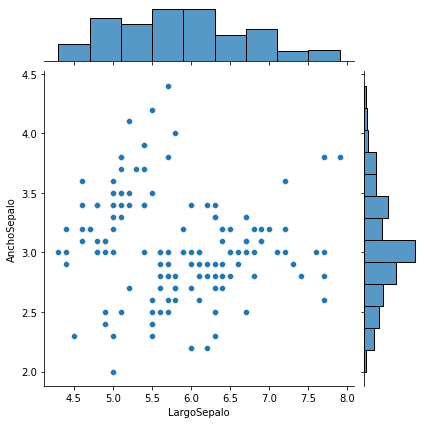

In [ ]:
sns.jointplot(data=df, x="LargoSepalo", y="AnchoSepalo")
#https://seaborn.pydata.org/generated/seaborn.jointplot.html

**7. Repita el ejercicio anterior, pero esta vez usando joinplot con kind="hexbin".**

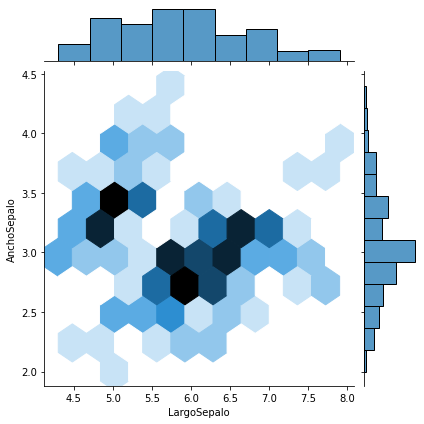

In [ ]:
sns.jointplot(data=df, x="LargoSepalo", y="AnchoSepalo",kind="hex")

# C) Ejercicios de regresión logística

**1. Muestre los percentiles, media y desviación estándar de cada especie ('Iris-setosa', 'Iris-versicolor' e 'Iris- virginica').**

In [ ]:
copia = df.copy()
copia.set_index("Clase",inplace = True)
ISe = copia.loc["Iris-setosa"]
IVe = copia.loc["Iris-versicolor"]
IVi = copia.loc["Iris-virginica"]

for especie in ["Iris-setosa","Iris-versicolor","Iris-virginica"]:
  print("Especie:",especie)
  aux = copia.loc[especie]
  print(aux.describe().iloc[[4,5,6,1,2]],"\n")

Especie: Iris-setosa
      LargoSepalo  AnchoSepalo  LargoPetalo  AnchoPetalo
25%       4.80000     3.125000     1.400000      0.20000
50%       5.00000     3.400000     1.500000      0.20000
75%       5.20000     3.675000     1.575000      0.30000
mean      5.00600     3.418000     1.464000      0.24400
std       0.35249     0.381024     0.173511      0.10721 

Especie: Iris-versicolor
      LargoSepalo  AnchoSepalo  LargoPetalo  AnchoPetalo
25%      5.600000     2.525000     4.000000     1.200000
50%      5.900000     2.800000     4.350000     1.300000
75%      6.300000     3.000000     4.600000     1.500000
mean     5.936000     2.770000     4.260000     1.326000
std      0.516171     0.313798     0.469911     0.197753 

Especie: Iris-virginica
      LargoSepalo  AnchoSepalo  LargoPetalo  AnchoPetalo
25%       6.22500     2.800000     5.100000      1.80000
50%       6.50000     3.000000     5.550000      2.00000
75%       6.90000     3.175000     5.875000      2.30000
mean      6.58

**2. Cree una gráfica de dispersión de la longitud del sépalo y ancho del pétalo mostrando en la gráfica las tres especies con distintos colores.**

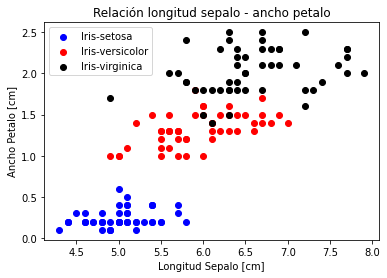

In [7]:
# Encontrar los datos necesarios
sepalLength = list(df["LargoSepalo"])
petalWidth = list(df["AnchoPetalo"])
# creando las graficas
plt.scatter(sepalLength[:50],petalWidth[:50],label="Iris-setosa",color="blue")
plt.scatter(sepalLength[50:100],petalWidth[50:100],label="Iris-versicolor",color="red")
plt.scatter(sepalLength[100:150],petalWidth[100:150],label="Iris-virginica",color="black")
# para que se vea bonito
plt.legend()
plt.title("Relación longitud sepalo - ancho petalo")
plt.xlabel("Longitud Sepalo [cm]")
plt.ylabel("Ancho Petalo [cm]")
plt.show()

**3. En el modelado estadístico, el análisis de regresión es un proceso para estimar la relación entre variables. Investigue y describa la regresión logística.**

In [ ]:
#https://realpython.com/logistic-regression-python/#classification

**4. Clasifique los datos mediante regresión logística y mida el desempeño de su modelo. Describa la medida usada para medir el desempeño de su modelo.**

In [1]:
# importamos las herramientas necesarias para crear los modelos
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
# inicializamos los 3 modelos
modeloTodos = LogisticRegression(max_iter=1000)
modeloLPAP = LogisticRegression()
modeloLSAP = LogisticRegression()

In [6]:
# Definición de los datasets
X = df[["LargoSepalo","AnchoSepalo","LargoPetalo","AnchoPetalo"]]
# definimos las clases para cada conjunto de "features"
Y = df[["Clase"]]
# dividimos el dataset en tran y test set
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
# es necesario redimensionar los sets de Y ya que la función anterior
# regresa solo una lista, es necesario que sea un arreglo de tamaño
# (n_samples,). Usamos np.ravel por que no se puede redimensionar
# un Dataframe con reshape() o alterando el atributo shape
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [ ]:
# Entrenamiento del modelo *************************************************
# Aquí escogemos que características usaremos
modeloTodos.fit(x_train[["LargoSepalo","AnchoSepalo","LargoPetalo","AnchoPetalo"]]
                ,y_train)
# Evaluación del modelo ****************************************************
y_predecida_todos = modeloTodos.predict(x_test)
y_test_todos = y_test
cal = modeloTodos.score(x_test,y_test) # buscar que hace esta función
print("Precisión del modelo: {0}%".format(cal*100))

Precisión del modelo: 93.33333333333333%


In [ ]:
# Entrenamiento del modelo *************************************************
# Aquí escogemos que características usaremos
modeloLPAP.fit(x_train[["LargoPetalo","AnchoPetalo"]],y_train)
# Evaluación del modelo ****************************************************
y_predecida_LPAP = modeloLPAP.predict(x_test[["LargoPetalo","AnchoPetalo"]])
y_test_LPAP = y_test
cal = modeloLPAP.score(x_test[["LargoPetalo","AnchoPetalo"]],
                       y_test) # buscar que hace esta función
print("Precisión del modelo: {0}%".format(cal*100))

Precisión del modelo: 93.33333333333333%


In [ ]:
# Entrenamiento del modelo *************************************************
# Aquí escogemos que características usaremos
modeloLSAP.fit(x_train[["LargoSepalo","AnchoPetalo"]],y_train)
# Evaluación del modelo ****************************************************
y_predecida_LSAP = modeloLSAP.predict(x_test[["LargoSepalo","AnchoPetalo"]])
y_test_LSAP = y_test
cal = modeloLSAP.score(x_test[["LargoSepalo","AnchoPetalo"]],y_test) # buscar que hace esta función
print("Precisión del modelo: {0}%".format(cal*100))

Precisión del modelo: 83.33333333333334%


**Matrices de confusión**

In [ ]:
from sklearn.metrics import confusion_matrix 

In [ ]:
# determinamos las matrices de confusión
cm_Todos = confusion_matrix(y_test_todos,y_predecida_todos)
cm_LPAP = confusion_matrix(y_test_LPAP,y_predecida_LPAP)
cm_LSAP = confusion_matrix(y_test_LSAP,y_predecida_LSAP)

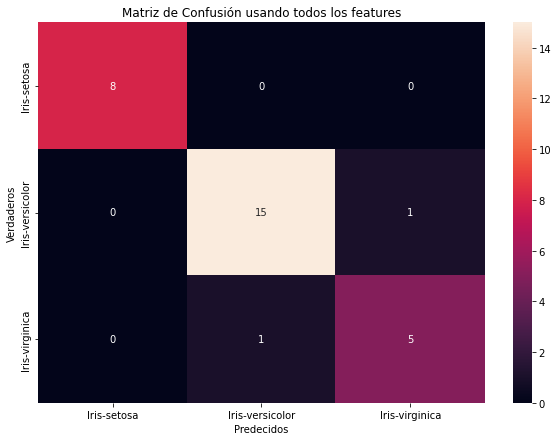

In [ ]:
# Graficamos con el mapa de calor de seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm_Todos,annot=True)
# Edición para que sea más comprensible el gráfico
plt.xlabel("Predecidos")
plt.ylabel("Verdaderos")
plt.title("Matriz de Confusión usando todos los features")
# Sirve para cambiarle las anotaciones a los ejes
plt.xticks([0.5,1.5,2.5],labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])
plt.yticks([0.5,1.5,2.5],labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])
plt.show()

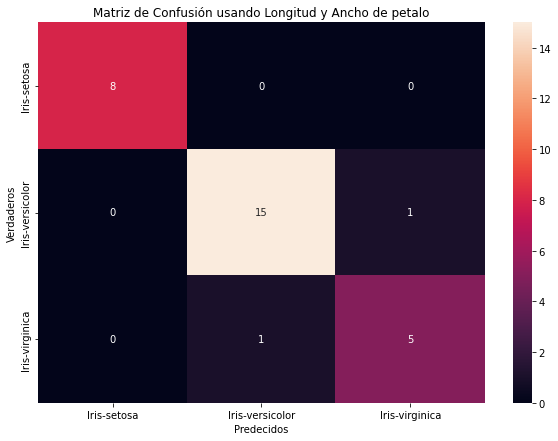

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_LPAP,annot=True)
plt.xlabel("Predecidos")
plt.ylabel("Verdaderos")
plt.title("Matriz de Confusión usando Longitud y Ancho de petalo")
plt.xticks([0.5,1.5,2.5],labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])
plt.yticks([0.5,1.5,2.5],labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])
plt.show()

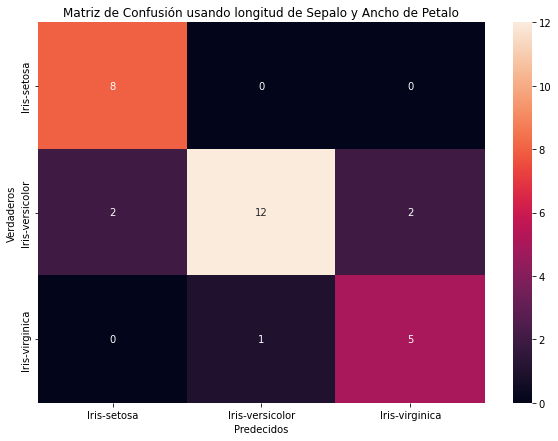

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_LSAP,annot=True)
plt.xlabel("Predecidos")
plt.ylabel("Verdaderos")
plt.title("Matriz de Confusión usando longitud de Sepalo y Ancho de Petalo")
plt.xticks([0.5,1.5,2.5],labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])
plt.yticks([0.5,1.5,2.5],labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])
plt.show()

## Pruebas

### Prueba con clasificación binaria

In [ ]:
rutaDatos = "/content/iris.data"
df = pd.read_csv(rutaDatos,header=None)

headers = ['LargoSepalo','AnchoSepalo','LargoPetalo','AnchoPetalo','Clase']
df.columns=headers

copia = df.copy()
copia.set_index("Clase",inplace = True)
ISe = copia.loc["Iris-setosa"]
IVe = copia.loc["Iris-versicolor"]
IVi = copia.loc["Iris-virginica"]

Datos = copia.loc[["Iris-setosa","Iris-versicolor"]]
print(Datos)

                 LargoSepalo  AnchoSepalo  LargoPetalo  AnchoPetalo
Clase                                                              
Iris-setosa              5.1          3.5          1.4          0.2
Iris-setosa              4.9          3.0          1.4          0.2
Iris-setosa              4.7          3.2          1.3          0.2
Iris-setosa              4.6          3.1          1.5          0.2
Iris-setosa              5.0          3.6          1.4          0.2
...                      ...          ...          ...          ...
Iris-versicolor          5.7          3.0          4.2          1.2
Iris-versicolor          5.7          2.9          4.2          1.3
Iris-versicolor          6.2          2.9          4.3          1.3
Iris-versicolor          5.1          2.5          3.0          1.1
Iris-versicolor          5.7          2.8          4.1          1.3

[100 rows x 4 columns]


    clase  largo
0       1    1.4
1       1    1.4
2       1    1.3
3       1    1.5
4       1    1.4
..    ...    ...
95      0    4.2
96      0    4.2
97      0    4.3
98      0    3.0
99      0    4.1

[100 rows x 2 columns]


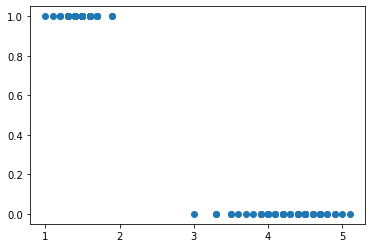

In [ ]:
# https://www.analyticslane.com/2019/05/10/operaciones-de-filtrado-de-dataframe-con-pandas-en-base-a-los-valores-de-las-columnas/
ISe = df[df['Clase']=='Iris-setosa']
IVe = df[df['Clase']=='Iris-versicolor']
junto = df[df['Clase'].isin(['Iris-setosa','Iris-versicolor'])]
lista = []
lista2 = []

for i in range(len(junto)):
  if (df['Clase'][i]=='Iris-setosa'):
    clase = 1
  else:
    clase = 0
  lista.append(clase)
  lista2.append(df['LargoPetalo'][i])

nuevo = pd.DataFrame(zip(lista,lista2))
nuevo.columns=["clase","largo"]
print(nuevo)

plt.scatter(data=nuevo,x="largo",y="clase")

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(nuevo[['largo']],nuevo[["clase"]],
                                                 test_size=0.1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
x_test

,largo
70,4.8
67,4.1
78,4.5
88,4.1
85,4.5
64,3.6
50,4.7
42,1.3
62,4.0
15,1.5


In [ ]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

### Prueba con clasificación multiclase
https://www.youtube.com/watch?v=J5bXOOmkopc&ab_channel=codebasics

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [ ]:
print(digits.data[0])
print(digits.images[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

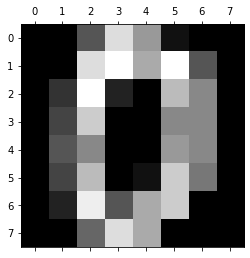

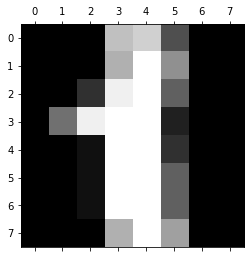

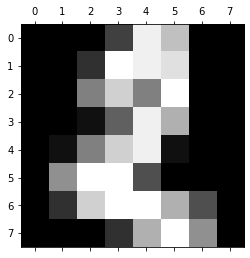

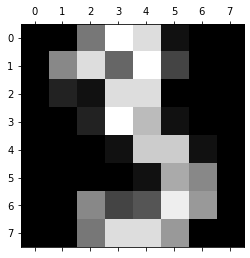

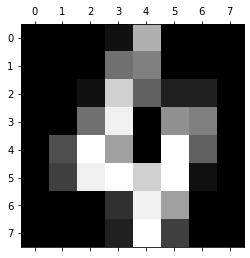

In [ ]:
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])
  plt.show()

In [ ]:
print(digits.target[:5])
print(digits.target_names[:5])

[0 1 2 3 4]
[0 1 2 3 4]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,
                                                 test_size=0.2)

In [ ]:
print(len(x_train),len(x_test))
print(x_test[0:5])

1437 360
[[ 0.  0.  0. 15. 12.  1.  0.  0.  0.  0.  5. 16. 16.  6.  0.  0.  0.  0.
   2. 16. 16.  3.  0.  0.  0.  0.  2. 16. 16.  1.  0.  0.  0.  0.  6. 16.
  13.  0.  0.  0.  0.  0.  1. 16. 16.  2.  0.  0.  0.  0.  3. 16. 15.  3.
   0.  0.  0.  0.  0. 15. 16.  1.  0.  0.]
 [ 0.  6. 13.  5.  8.  8.  1.  0.  0.  8. 16. 16. 16. 16.  6.  0.  0.  6.
  16.  9.  6.  4.  0.  0.  0.  6. 16. 16. 15.  5.  0.  0.  0.  0.  4.  5.
  15. 12.  0.  0.  0.  0.  0.  3. 16.  9.  0.  0.  0.  1.  8. 13. 15.  3.
   0.  0.  0.  4. 16. 15.  3.  0.  0.  0.]
 [ 0.  0.  0.  2. 13.  1.  0.  0.  0.  0.  0.  9. 15.  2.  0.  0.  0.  0.
   4. 16. 16.  8.  0.  0.  0.  0. 12.  9. 14.  6.  0.  0.  0.  5. 14.  0.
  13.  7.  1.  0.  0.  9. 15. 12. 16. 16.  4.  0.  0.  2.  8.  9. 16. 10.
   1.  0.  0.  0.  0.  1. 13.  2.  0.  0.]
 [ 0.  0.  5. 12.  1.  0.  0.  0.  0.  0. 15. 14.  7.  0.  0.  0.  0.  0.
  13.  1. 12.  0.  0.  0.  0.  2. 10.  0. 14.  0.  0.  0.  0.  0.  2.  0.
  16.  1.  0.  0.  0.  0.  0.  6. 15.  0.  0.  0

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(x_test,y_test)

0.975

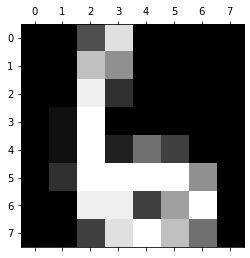

In [ ]:
plt.matshow(digits.images[67])

In [ ]:
model.predict([digits.data[67]])

array([6])